In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from sklearn import datasets
from matplotlib.colors import ListedColormap
iris = datasets.load_iris() 

Zadanie 0. (2 punkty)
Zaimplementuj algorytm K-Means. Postaraj się, żeby implementacja była efektywna, bo będzie on
w przyszłości używany do przetwarzania dużych zbiorów danych. Sprawdź działanie
zaimplementowanego algorytmu na danych IRIS. 


czas:  0.04974174499511719


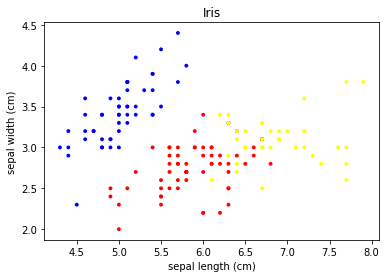

In [0]:
def dist(X, Y):
  return -2* np.dot(X, Y.T) + np.sum(Y ** 2, axis=0)

def mean(X):
  return np.sum(X, axis=0) / np.size(X, axis=0)

def kMeans(scope, K):
  change = True
  axis0 = np.size(scope, 0)
  axis1 = np.size(scope, 1)
  target = np.zeros(axis0)
  centroids = np.zeros((K, axis1))
  for i in range(K):
    centroids[i] = scope[random.randint(0, axis0-1)] 
  while change:    
    change = False
    for i in range(axis0): ##pętla do tworzenia grup 
      minimum = math.inf
      group = -1
      for k in range(K):
        distance = dist(scope[i], centroids[k])     
        if distance < minimum:
          minimum = distance
          group = k
      if group != target[i]:
        change = True
        target[i] = group
    if change == False:
      return centroids, target
    for k in range(K):
      centroids[k] = mean(scope[target==k])
    

czas = time.time()
centra, targets = kMeans(iris.data, 3)
print('czas: ', time.time() - czas)

X = iris.data[:, 0]
Y = iris.data[:, 1]

plt.title('Iris')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
kolory = ListedColormap(['red', 'blue', 'yellow'])
plt.scatter(X, Y, c=targets, marker='o', linewidth=0, cmap=kolory, s=15)
plt.show()